In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

DATA EXPlORATION

In [ ]:
df=pd.read_csv('/content/Netflix Life Impact Dataset (NLID).csv')

In [ ]:
df.head(7)

,Movie Title,Genre,Release Year,Average Rating,Number of Reviews,Review Highlights,Minute of Life-Changing Insight,How Discovered,Meaningful Advice Taken,Suggested to Friends/Family (Y/N %)
0,The Pursuit of Happyness,Drama,2006,9.1,42000,"""Will Smith’s struggle hit hard. A must-watch!...",78:15 – Chris gets the job,Friend suggested,Persistence pays off.,92% Y
1,The Social Dilemma,Documentary,2020,8.2,35000,"""Eye-opening about tech addiction."" / ""Some cl...",12:40 – Algorithm manipulation,Social media,Limit screen time for mental health.,88% Y
2,Parasite,Thriller/Drama,2019,9.3,50000,"""Masterpiece on class inequality."" / ""Too dark...",1:12:00 – The flood scene,Netflix recommendation,Privilege isn’t always visible.,85% Y
3,Paddington 2,Comedy/Family,2017,8.8,28000,"""Pure joy! Teaches kindness effortlessly."" / ""...",33:10 – Paddington’s jail speech,Friend suggested,Always choose kindness.,95% Y
4,Inception,Sci-Fi,2010,9.0,45000,"""Mind-bending brilliance."" / ""Confusing plot.""",1:05:22 – Cobb’s totem scene,Social media,Reality is subjective.,80% Y
5,Lady Bird,Comedy/Drama,2017,8.6,22000,"""Perfect coming-of-age film."" / ""Slow pacing.""",47:30 – Argument with mother,Netflix recommendation,Parents sacrifice more than we see.,76% Y
6,13th,Documentary,2016,8.9,18000,"""Essential viewing on systemic racism."" / ""Hea...",25:15 – Prison-industrial complex,Podcast mention,Justice requires awareness.,90% Y


In [ ]:
df.tail(6)

,Movie Title,Genre,Release Year,Average Rating,Number of Reviews,Review Highlights,Minute of Life-Changing Insight,How Discovered,Meaningful Advice Taken,Suggested to Friends/Family (Y/N %)
76,The Open House,Horror,2018,4.5,12000,"""Inept horror."" / ""No scares.""",1:00:00 – Empty house,Netflix original,Some doors should stay closed.,30% Y
77,The Last Days of American Crime,Action,2020,4.0,9000,"""Worst Netflix film?"" / ""Unwatchable.""",1:30:00 – Final heist,Netflix original,Crime doesn’t pay (literally).,20% Y
78,Klaus,Animation,2019,8.7,32000,"""Instant Christmas classic."" / ""Predictable.""",1:05:00 – Gift delivery montage,Netflix original,Kindness sparks miracles.,94% Y
79,Ma Rainey’s Black Bottom,Drama,2020,7.9,25000,"""Chadwick Boseman’s last role."" / ""Theatrical.""","1:20:00 – ""They Don’t Care"" monologue",Oscar buzz,Art demands sacrifice.,85% Y
80,Piece of Women,Drama,2021,8.3,27000,"""Devastating childbirth scene."" / ""Graphic.""",1:10:00 – Courtroom speech,Film festival,Grief changes everything.,76% Y
81,The Harder They Fall,Western,2021,7.6,18000,"""Stylish Black cowboy flick."" / ""Style over su...",1:20:00 – Final shootout,Netflix recommendation,Revenge is a loop.,73% Y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Movie Title                          82 non-null     object 
 1   Genre                                82 non-null     object 
 2   Release Year                         82 non-null     int64  
 3   Average Rating                       82 non-null     float64
 4   Number of Reviews                    82 non-null     int64  
 5   Review Highlights                    82 non-null     object 
 6   Minute of Life-Changing Insight      82 non-null     object 
 7   How Discovered                       82 non-null     object 
 8   Meaningful Advice Taken              82 non-null     object 
 9   Suggested to Friends/Family (Y/N %)  82 non-null     object 
dtypes: float64(1), int64(2), object(7)
memory usage: 6.5+ KB


In [ ]:
df.describe().round(2)

,Release Year,Average Rating,Number of Reviews
count,82.00,82.00,82.00
mean,2018.30,7.55,23146.34
std,2.37,1.10,12796.72
min,2006.00,4.00,8000.00
25%,2017.25,6.93,13000.00
50%,2019.00,7.80,19000.00
75%,2020.00,8.30,31000.00
max,2021.00,9.40,65000.00


In [ ]:
df['Movie Title'].unique()

array(['The Pursuit of Happyness', 'The Social Dilemma', 'Parasite',
       'Paddington 2', 'Inception', 'Lady Bird', '13th', 'The Half of It',
       'Whiplash', 'Coco', 'Silver Linings Playbook',
       'The Trial of the Chicago 7', "The Queen's Gambit",
       'I Lost My Body', 'The Florida Project', 'Roma', 'The Irishman',
       'Marriage Story', 'Dolemite Is My Name',
       'The Ballad of Buster Scruggs', 'Da 5 Bloods', 'The Midnight Sky',
       'Mank', 'The Lost Daughter', "Don't Look Up",
       'The Power of the Dog', 'The Dig', 'Passing',
       'The Mitchells vs. The Machines', 'Okja', 'The Guilty',
       'The White Tiger', "Ma Rainey's Black Bottom", 'The Two Popes',
       'Extraction', 'Enola Holmes', 'The Old Guard',
       'Eurovision Song Contest: The Story of Fire Saga', 'The Platform',
       'Uncut Gems', 'Beasts of No Nation',
       "To All the Boys I've Loved Before", 'The Devil All the Time',
       "Gerald's Game", 'The Babysitter', 'The Invitation', 'Bird B

In [ ]:
df['Genre'].unique()

array(['Drama', 'Documentary', 'Thriller/Drama', 'Comedy/Family',
       'Sci-Fi', 'Comedy/Drama', 'Romance/Drama', 'Animation',
       'Historical Drama', 'Crime/Drama', 'Comedy', 'Western',
       'War/Drama', 'Satire', 'Adventure', 'Thriller', 'Action',
       'Mystery', 'Horror', 'Romance', 'Horror/Comedy', 'Comedy/Crime'],
      dtype=object)

In [ ]:
df['Genre'].value_counts()

,count
Genre,
Drama,24
Comedy,8
Thriller,7
Horror,6
Sci-Fi,6
Romance,5
Action,4
Animation,4
Western,2


In [ ]:
df['How Discovered'].unique()

array(['Friend suggested', 'Social media', 'Netflix recommendation',
       'Podcast mention', 'Film class', 'Book adaptation',
       'Word of mouth', 'Film festival', 'Critic review',
       'Netflix original', 'Film critic', 'Stephen King adaptation',
       'Oscar buzz'], dtype=object)

In [ ]:
df['How Discovered'].value_counts()

,count
How Discovered,
Netflix original,48
Netflix recommendation,13
Friend suggested,5
Film festival,4
Social media,3
Film critic,2
Podcast mention,1
Film class,1
Book adaptation,1


In [ ]:
df['Suggested to Friends/Family (Y/N %)'].unique()

array(['92% Y', '88% Y', '85% Y', '95% Y', '80% Y', '76% Y', '90% Y',
       '70% Y', '82% Y', '97% Y', '81% Y', '87% Y', '93% Y', '79% Y',
       '73% Y', '84% Y', '75% Y', '89% Y', '83% Y', '71% Y', '77% Y',
       '65% Y', '68% Y', '72% Y', '74% Y', '78% Y', '86% Y', '61% Y',
       '69% Y', '58% Y', '63% Y', '60% Y', '52% Y', '55% Y', '62% Y',
       '59% Y', '53% Y', '50% Y', '48% Y', '57% Y', '51% Y', '45% Y',
       '30% Y', '20% Y', '94% Y'], dtype=object)

# DATA PREPROCESSING

In [ ]:
df.isna().sum()

,0
Movie Title,0
Genre,0
Release Year,0
Average Rating,0
Number of Reviews,0
Review Highlights,0
Minute of Life-Changing Insight,0
How Discovered,0
Meaningful Advice Taken,0
Suggested to Friends/Family (Y/N %),0


In [ ]:
df.duplicated().sum()

np.int64(0)

# EDA

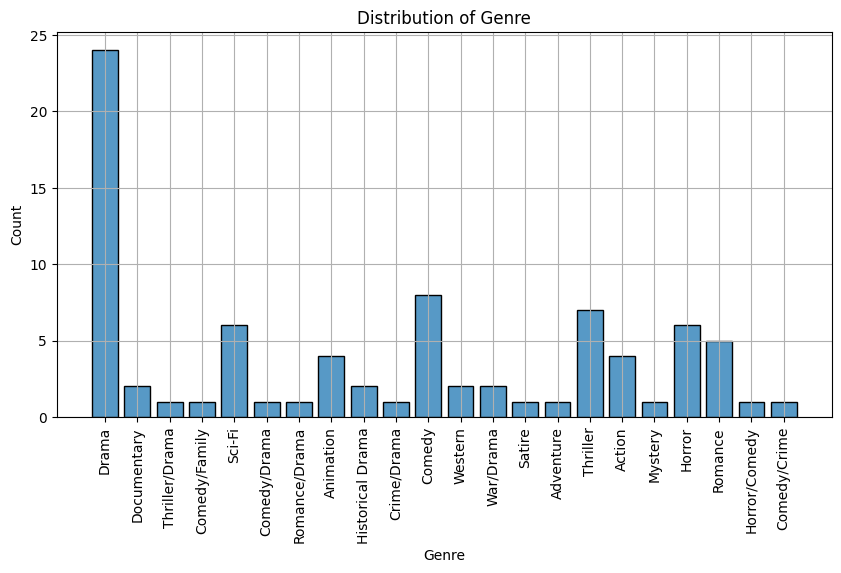

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=df,x='Genre',multiple='stack',shrink=.8,fill=True,bins=20,binwidth=0.1)
plt.xlabel('Genre')
plt.xticks(rotation=90)
plt.grid(True)
plt.ylabel('Count')
plt.title('Distribution of Genre')
plt.show()

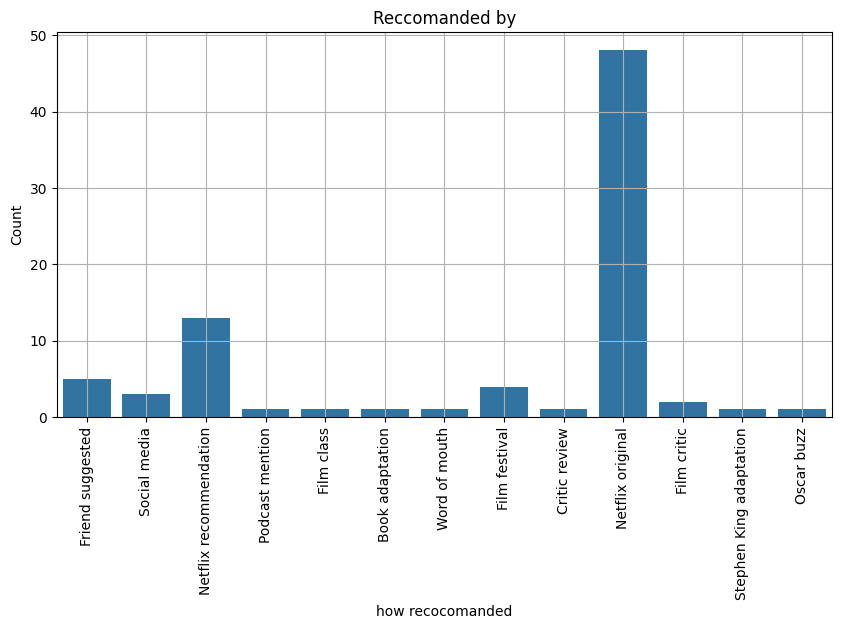

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='How Discovered')
plt.xlabel('how recocomanded')
plt.xticks(rotation=90)
plt.grid(True)
plt.ylabel('Count')
plt.title('Reccomanded by')
plt.show()

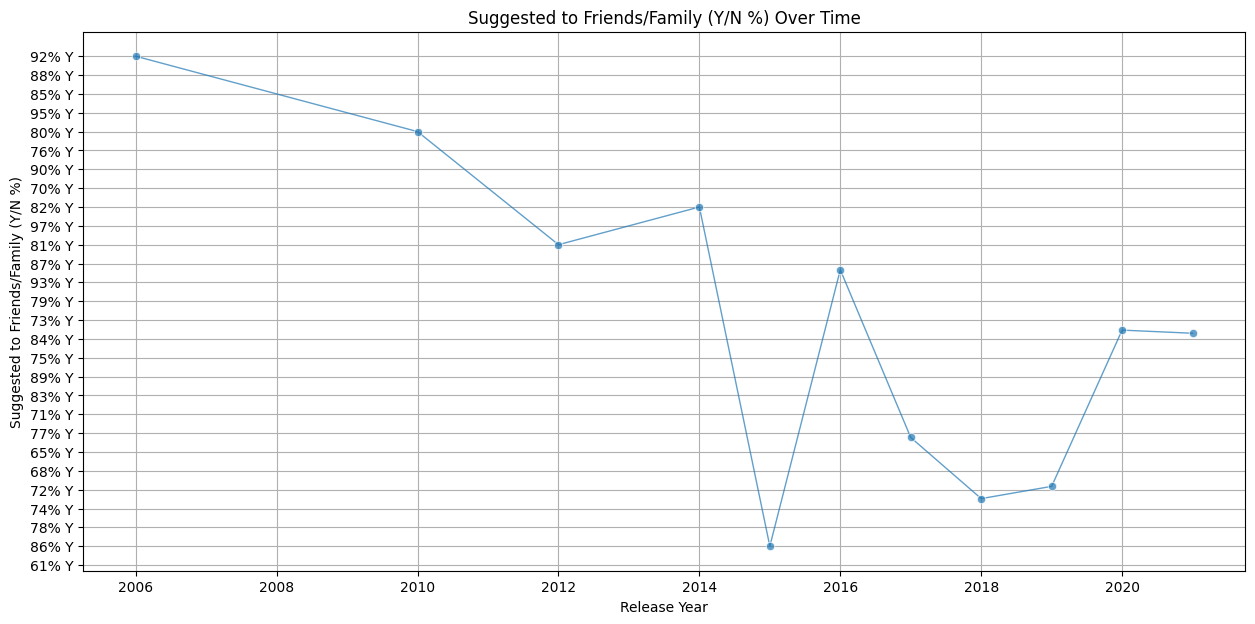

In [ ]:
plt.figure(figsize=(15,7))
sns.lineplot(data=df,x='Release Year',y='Suggested to Friends/Family (Y/N %)',palette='Set2',marker='o',linewidth=1,alpha=0.7,ci=None,err_style='bars',err_kws={'capsize':3})
plt.xlabel('Release Year')
plt.ylabel('Suggested to Friends/Family (Y/N %)')
plt.title('Suggested to Friends/Family (Y/N %) Over Time')
plt.grid(True)
plt.show()

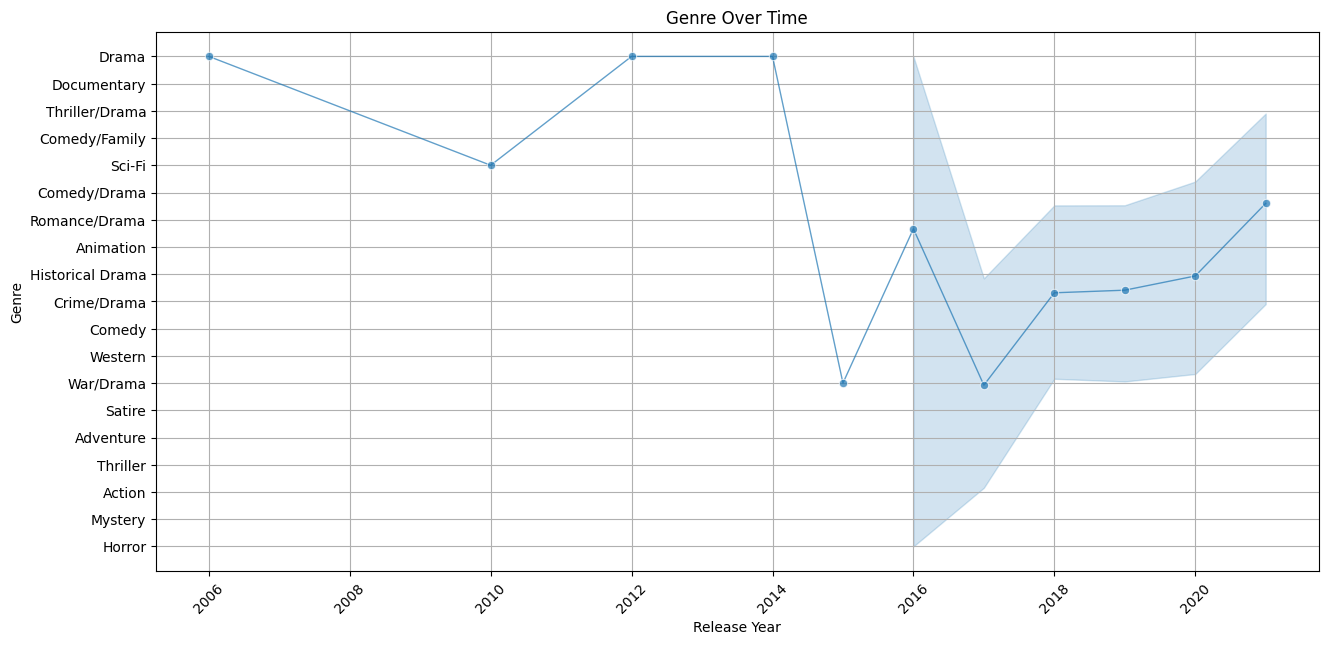

In [ ]:
plt.figure(figsize=(15,7))
sns.lineplot(data=df,x='Release Year',y='Genre',palette='Set2',marker='o',linewidth=1,alpha=0.7)
plt.xticks(rotation=45)
plt.xlabel('Release Year')
plt.ylabel('Genre')
plt.title('Genre Over Time')
plt.grid(True)
plt.show()

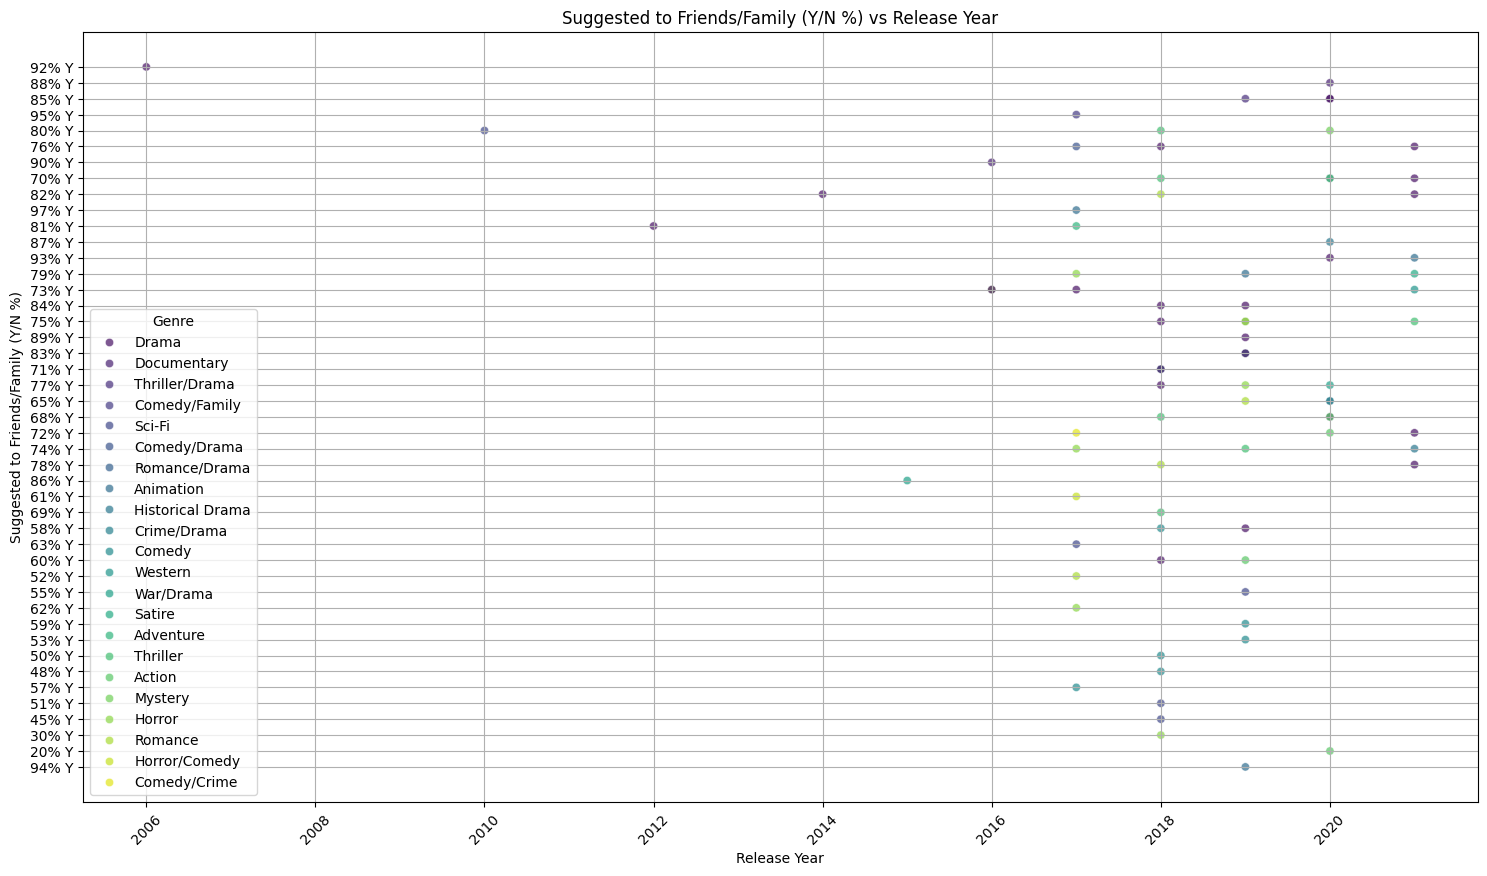

In [ ]:
plt.figure(figsize=(18,10))
sns.scatterplot(data=df,x='Release Year',y='Suggested to Friends/Family (Y/N %)',hue='Genre',palette='viridis',alpha=0.7)
plt.xlabel('Release Year')
plt.xticks(rotation=45)
plt.ylabel('Suggested to Friends/Family (Y/N %)')
plt.title('Suggested to Friends/Family (Y/N %) vs Release Year')
plt.grid(True)
plt.show()

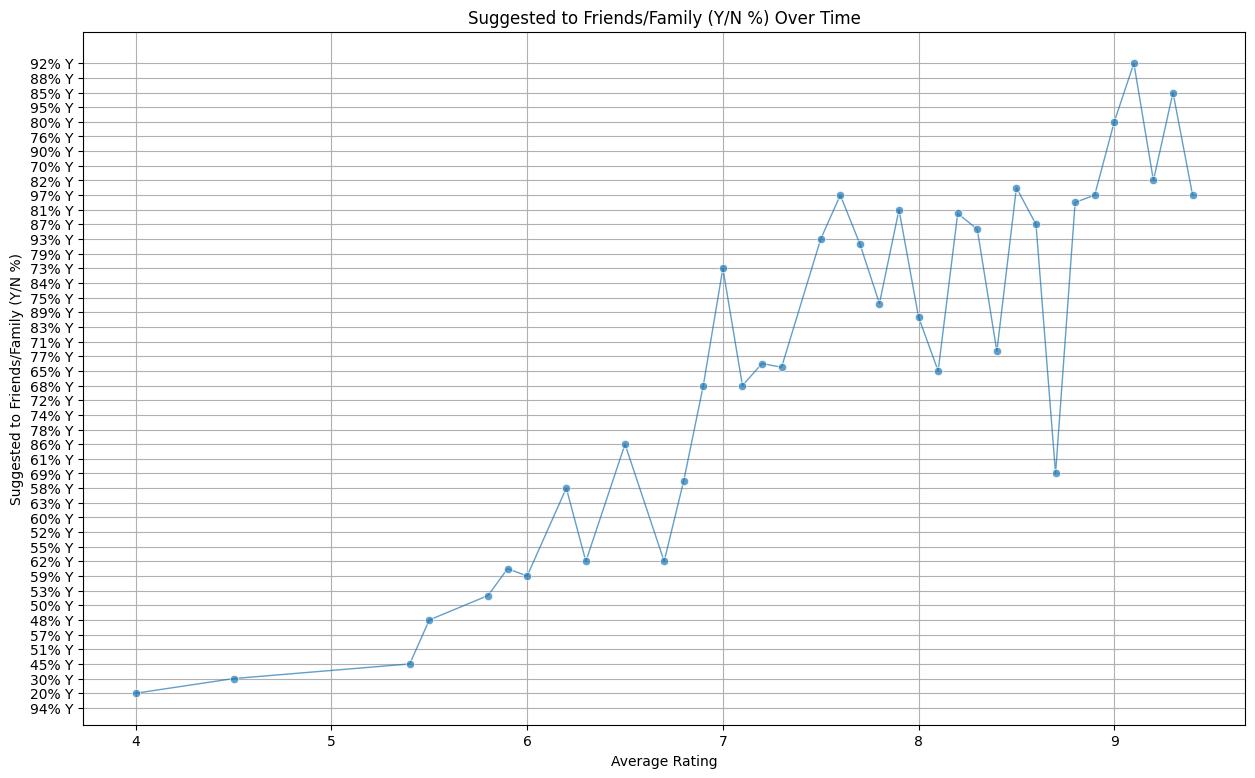

In [ ]:
plt.figure(figsize=(15,9))
sns.lineplot(data=df,x='Average Rating',y='Suggested to Friends/Family (Y/N %)',palette='Set2',marker='o',linewidth=1,alpha=0.7,ci=None,err_style='bars',err_kws={'capsize':3})
plt.xlabel('Average Rating')
plt.ylabel('Suggested to Friends/Family (Y/N %)')
plt.title('Suggested to Friends/Family (Y/N %) Over Time')
plt.grid(True)
plt.show()

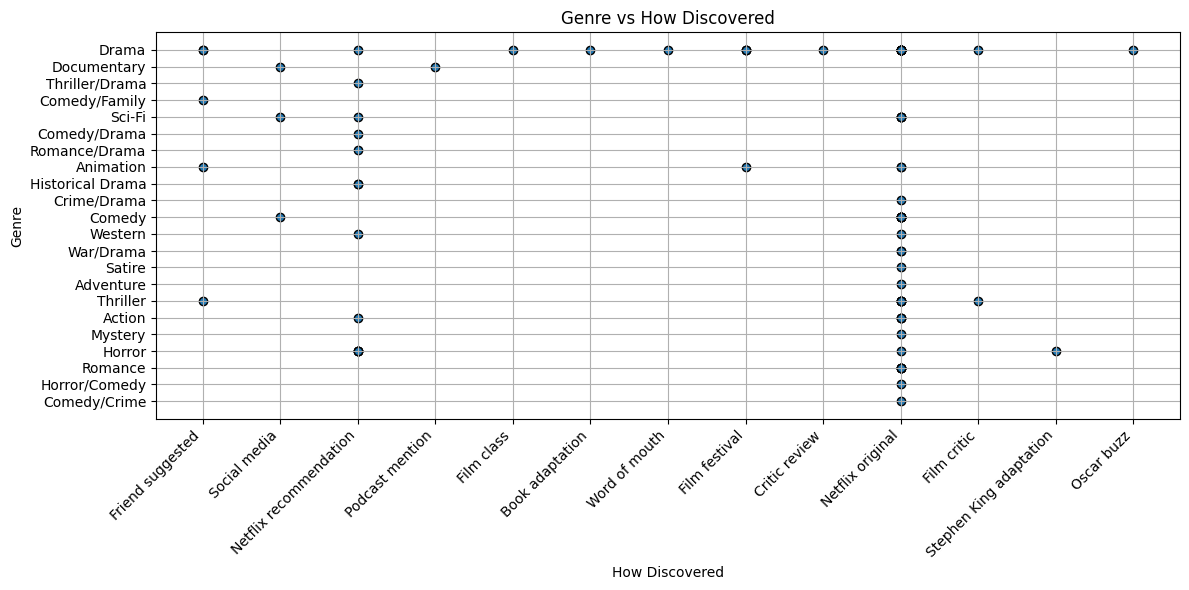

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df,x='How Discovered',y='Genre',palette='Set2',edgecolor='black',linewidth=1)
plt.xlabel('How Discovered')
plt.xticks(rotation=45,ha='right')
plt.ylabel('Genre')
plt.title('Genre vs How Discovered')
plt.grid(True)
plt.tight_layout()

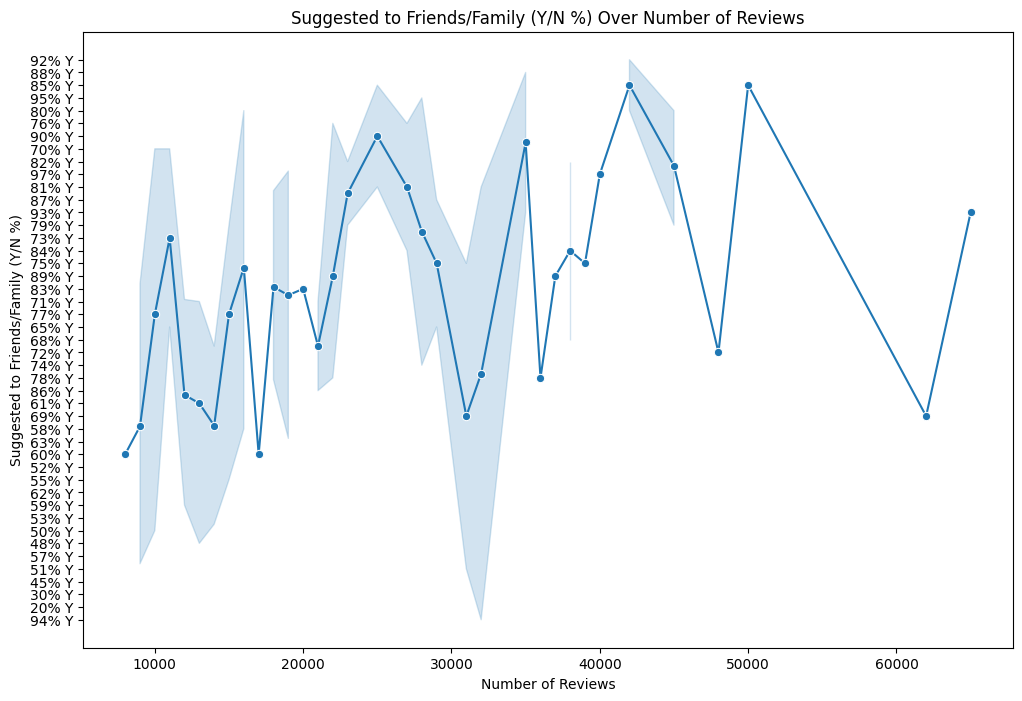

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df,x='Number of Reviews',y='Suggested to Friends/Family (Y/N %)',palette='coolwarm',marker='o')
plt.xlabel('Number of Reviews')
plt.ylabel('Suggested to Friends/Family (Y/N %)')
plt.title('Suggested to Friends/Family (Y/N %) Over Number of Reviews')
plt.show()

In [ ]:
df.groupby(['Release Year','Genre'])['Suggested to Friends/Family (Y/N %)'].sum()

Release Year  Genre           
2006          Drama                                        92% Y
2010          Sci-Fi                                       80% Y
2012          Drama                                        81% Y
2014          Drama                                        82% Y
2015          War/Drama                                    86% Y
2016          Documentary                                  90% Y
              Drama                                        73% Y
              Horror                                       73% Y
2017          Adventure                                    81% Y
              Animation                                    97% Y
              Comedy                                       57% Y
              Comedy/Crime                                 72% Y
              Comedy/Drama                                 76% Y
              Comedy/Family                                95% Y
              Drama                                        73% Y
              Horror                             79% Y74% Y62% Y
              Horror/Comedy                                61% Y
              Romance                                      52% Y
              Sci-Fi                                       63% Y
2018          Comedy                             58% Y50% Y48% Y
              Drama               84% Y71% Y77% Y76% Y75% Y60% Y
              Horror                                       30% Y
              Romance                                 82% Y78% Y
              Sci-Fi                                  51% Y45% Y
              Thriller                      69% Y80% Y68% Y70% Y
              Western                                      71% Y
2019          Action                                       60% Y
              Animation                               79% Y94% Y
              Comedy                             83% Y59% Y53% Y
              Crime/Drama                                  75% Y
              Drama                         89% Y83% Y84% Y58% Y
              Horror                                       77% Y
              Romance                                 75% Y65% Y
              Sci-Fi                                       55% Y
              Thriller                                     74% Y
              Thriller/Drama                               85% Y
2020          Action                             72% Y68% Y20% Y
              Comedy                                       65% Y
              Documentary                                  88% Y
              Drama                         93% Y68% Y85% Y85% Y
              Historical Drama                             87% Y
              Mystery                                      80% Y
              Romance/Drama                                70% Y
              Sci-Fi                                       65% Y
              Thriller                                     70% Y
              War/Drama                                    77% Y
2021          Animation                                    93% Y
              Drama                    72% Y82% Y70% Y78% Y76% Y
              Historical Drama                             74% Y
              Satire                                       79% Y
              Thriller                                     75% Y
              Western                                      73% Y
Name: Suggested to Friends/Family (Y/N %), dtype: object

In [ ]:
pv_2=df.pivot_table(index='Release Year',columns='Genre',values='Average Rating',aggfunc='sum')
df_melted_2=pv_2.reset_index().melt(id_vars='Release Year',var_name='Genre',value_name='Value')
df_clean_2=df_melted_2.dropna(subset=['Value'])
df_clean_2

,Release Year,Genre,Value
8,2019,Action,6.5
9,2020,Action,19.1
17,2017,Adventure,8.0
28,2017,Animation,9.4
30,2019,Animation,17.1
32,2021,Animation,8.7
39,2017,Comedy,6.3
40,2018,Comedy,17.6
41,2019,Comedy,19.9
42,2020,Comedy,7.0


In [ ]:
df['Average Rating']=pd.to_numeric(df['Average Rating'],errors='coerce')
df['Average Rating'].dtype

dtype('float64')

## Best movie based on rating

In [ ]:
df[df['Average Rating']==df['Average Rating'].max()]

,Movie Title,Genre,Release Year,Average Rating,Number of Reviews,Review Highlights,Minute of Life-Changing Insight,How Discovered,Meaningful Advice Taken,Suggested to Friends/Family (Y/N %)
9,Coco,Animation,2017,9.4,40000,"""Beautiful tribute to family and culture."" / ""...",1:15:10 – Remember Me scene,Friend suggested,Honor your roots.,97% Y


## Best movie based on number of reviews

In [ ]:
df[df['Number of Reviews']==df['Number of Reviews'].max()]

,Movie Title,Genre,Release Year,Average Rating,Number of Reviews,Review Highlights,Minute of Life-Changing Insight,How Discovered,Meaningful Advice Taken,Suggested to Friends/Family (Y/N %)
12,The Queen's Gambit,Drama,2020,8.9,65000,"""Anya Taylor-Joy is mesmerizing."" / ""Ignores c...",1:30:00 – Final match,Word of mouth,Obsession has a price.,93% Y


In [ ]:
top_10_movies_based_on_Rating=df.nlargest(10,'Average Rating')
top_10_movies_based_on_Rating[['Movie Title','Average Rating']].sort_values(by='Average Rating',ascending=False).reset_index(drop=True)

,Movie Title,Average Rating
0,Coco,9.4
1,Parasite,9.3
2,Whiplash,9.2
3,The Pursuit of Happyness,9.1
4,Inception,9.0
5,13th,8.9
6,The Queen's Gambit,8.9
7,Paddington 2,8.8
8,The Irishman,8.8
9,The Mitchells vs. The Machines,8.7


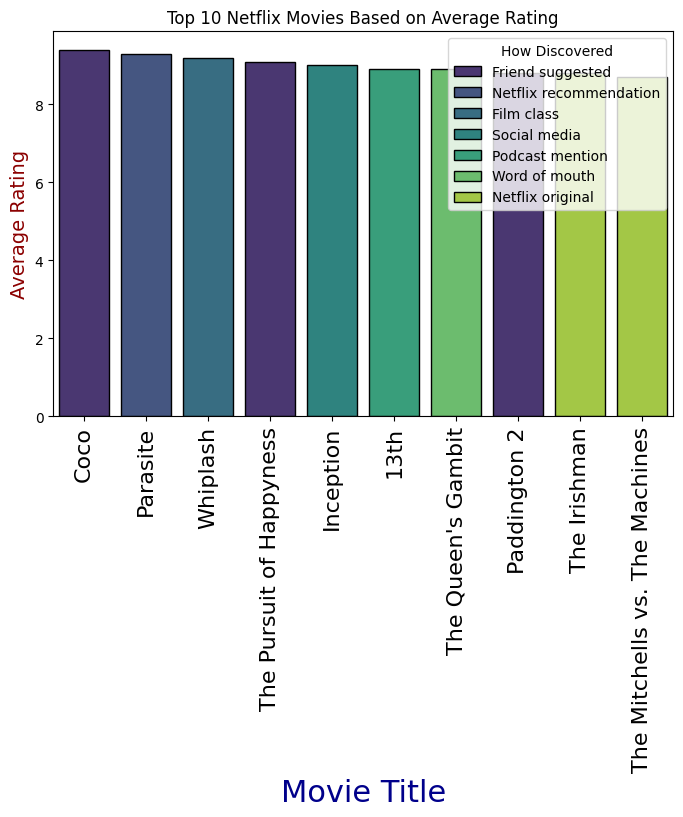

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data=top_10_movies_based_on_Rating,x='Movie Title',y='Average Rating',palette='viridis',edgecolor='black',linewidth=1,ci=None,hue='How Discovered')
plt.xticks(rotation=90,fontsize=16)
plt.xlabel('Movie Title',fontsize=22,color='darkblue')
plt.ylabel('Average Rating',fontsize=14,color='darkred')
plt.title('Top 10 Netflix Movies Based on Average Rating')
plt.show()

In [ ]:
top_10_movies_based_on_Reviews=df.nlargest(10,'Number of Reviews')
top_10_movies_based_on_Reviews[['Movie Title','Number of Reviews']].sort_values(by='Number of Reviews',ascending=False).reset_index(drop=True)

,Movie Title,Number of Reviews
0,The Queen's Gambit,65000
1,Bird Box,62000
2,Parasite,50000
3,Extraction,48000
4,Inception,45000
5,Don't Look Up,45000
6,To All the Boys I've Loved Before,45000
7,The Pursuit of Happyness,42000
8,Enola Holmes,42000
9,Coco,40000


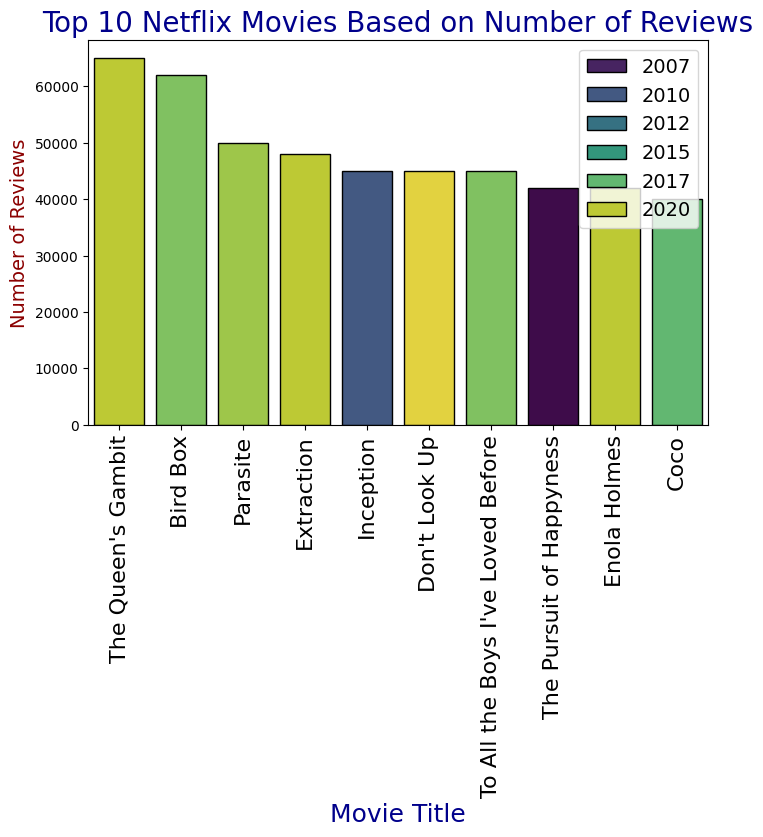

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data=top_10_movies_based_on_Reviews,x='Movie Title',y='Number of Reviews',palette='viridis',edgecolor='black',linewidth=1,ci=None,hue='Release Year')
plt.xticks(rotation=90,fontsize=16)
plt.xlabel('Movie Title',fontsize=18,color='darkblue')
plt.ylabel('Number of Reviews',fontsize=14,color='darkred')
plt.title('Top 10 Netflix Movies Based on Number of Reviews',fontsize=20,color='darkblue')
plt.legend(fontsize=14)
plt.show()

#Feature Eng

In [ ]:
df['target']=df['Suggested to Friends/Family (Y/N %)'].str.extract((r'(\d+)%')).astype(int)

In [ ]:
df['target']=df['target'].apply(lambda x:1 if x>=50 else 0)
df['target'].unique()

array([1, 0])

In [ ]:
df['target'].value_counts()

,count
target,
1,78
0,4


In [ ]:
df['Genre']=df['Genre'].str.split('/')

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

In [ ]:
mlb=MultiLabelBinarizer()
genre_encoded=mlb.fit_transform(df['Genre'])
genre_encoded_df=pd.DataFrame(genre_encoded,columns=mlb.classes_)
genre_encoded_df.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Historical Drama,Horror,Mystery,Romance,Satire,Sci-Fi,Thriller,War,Western
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
df=pd.concat([df.drop('Genre',axis=1),genre_encoded_df],axis=1)

In [ ]:
x=df.drop(['Movie Title','How Discovered','Suggested to Friends/Family (Y/N %)','target','Meaningful Advice Taken','Minute of Life-Changing Insight','Review Highlights'],axis=1)
y=df['target']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mn=MinMaxScaler()
x['Release Year']=mn.fit_transform(x[['Release Year']])
x['Average Rating']=mn.fit_transform(x[['Average Rating']])
x['Number of Reviews']=mn.fit_transform(x[['Number of Reviews']])

In [ ]:
x.head(2)

,Release Year,Average Rating,Number of Reviews,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Historical Drama,Horror,Mystery,Romance,Satire,Sci-Fi,Thriller,War,Western
0,0.000000,0.944444,0.596491,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0.933333,0.777778,0.473684,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


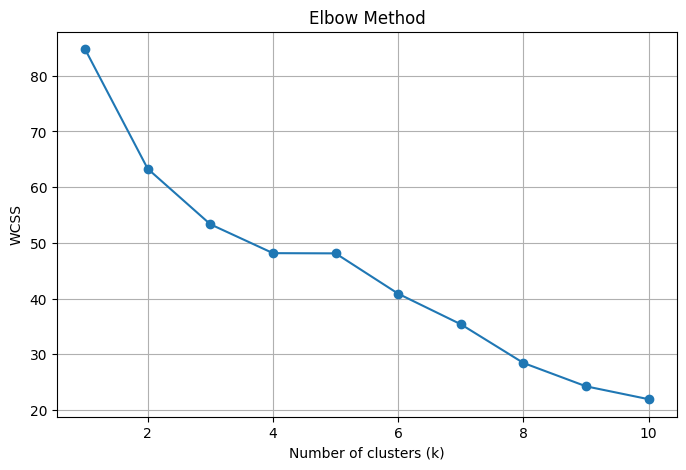

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
X = x
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


# modeling

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
kn=KNeighborsClassifier(n_neighbors=5,weights='distance')
kn.fit(x_train,y_train)

KNeighborsClassifier(weights='distance')

In [ ]:
kn.predict(x_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
accuracy_score(y_test,kn.predict(x_test))

0.9411764705882353

In [ ]:
print(classification_report(y_test, kn.predict(x_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.94      1.00      0.97        16

    accuracy                           0.94        17
   macro avg       0.47      0.50      0.48        17
weighted avg       0.89      0.94      0.91        17



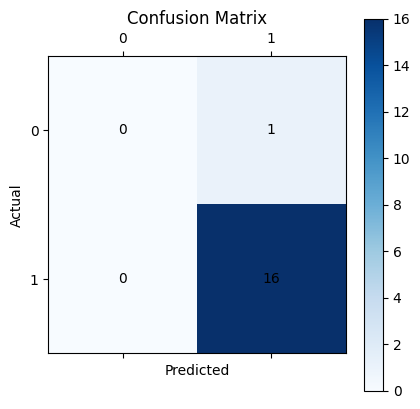

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = kn.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm, cmap='Blues')
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
for (i, j), val in np.ndenumerate(cm):
    plt.text(j, i, val, ha='center', va='center', color='black')
plt.show()